Problem Statement:
**BigMart Sales Prediction!**
Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.




Data Dictionary
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.



Train file: CSV containing the item outlet information with sales value.


The task is to predict Item_Outlet_Sales - which is a regression problem

In [1]:
# Import the pandas library
import pandas as pd
import numpy as np

In [2]:
# Load the datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [3]:
# Let's start with inspecting the shape of the data first
print("Shape of the training data:", train_df.shape)
print("Shape of the testing data:", test_df.shape)

Shape of the training data: (8523, 12)
Shape of the testing data: (5681, 11)


- Approximately good size of data is available in test scenario.
- 1 column is missing in the test data

In [4]:
print("\n--- Training Data Info ---")
print(train_df.info())


--- Training Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [5]:
train_df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


- in total 8523 rows of records we can see few columns like Item_Weight and Outlet_Size are having null values

In [6]:
print("\n--- Testing Data Info ---")
print(test_df.info())


--- Testing Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None


In [7]:
test_df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


similar columns are having null values in the test dataset as well

In [8]:
# Display the first few rows of the training data
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- Before imputing the null value columns, lets understand the data in the corresponding columns

In [9]:
train_df['Item_Weight'].value_counts()

,count
Item_Weight,
12.150,86
17.600,82
13.650,77
11.800,76
15.100,68
...,...
8.920,2
6.520,1
9.420,1


<Axes: title={'center': 'Item_Weight'}, xlabel='Item_Weight'>

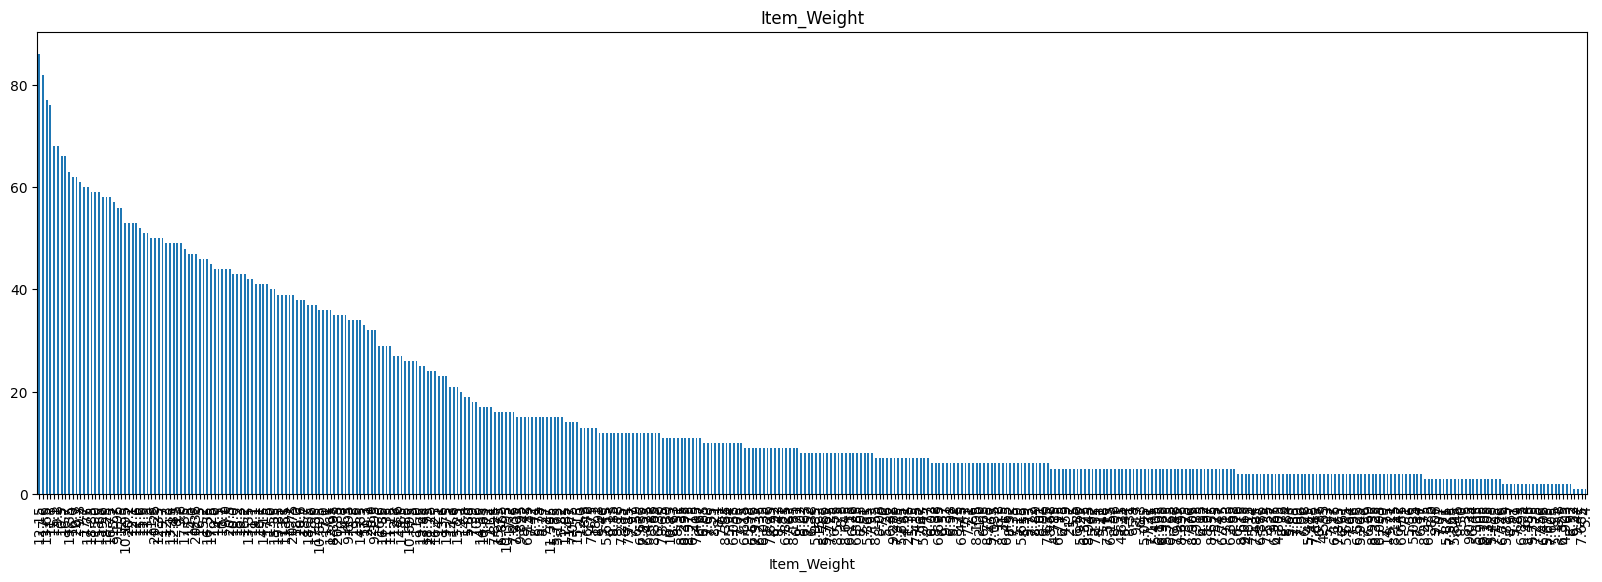

In [10]:
train_df['Item_Weight'].value_counts().plot(kind='bar', title='Item_Weight',figsize=(20,6))

- if we are going to impute based on the item weight alone, it will not be clear view. We need Item identifier or the item type to make a clear group scenario to impute the values for item_weight feature.
- Using both makes it redundant. instead of the item type which is broader scope, we can go ahead with the item identifier in our scenario

In [11]:
train_df.groupby('Item_Identifier')['Item_Weight'].value_counts()

,,count
Item_Identifier,Item_Weight,
DRA12,11.600,6
DRA24,19.350,5
DRA59,8.270,6
DRB01,7.390,2
DRB13,6.115,5
...,...,...
NCZ30,6.590,6
NCZ41,19.850,5
NCZ42,10.500,5


In [12]:
# Now Lets Fill the missing Item_Weight values in train and test dataframes
# As per our decision we plan to use item identifier along to find the mean value for item weight imputation
train_df['Item_Weight'] = train_df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
test_df['Item_Weight'] = test_df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))


In [13]:
# Verifying that there are no more missing values in Item_Weight
print(train_df['Item_Weight'].isnull().sum())
print(test_df['Item_Weight'].isnull().sum())

4
20


In [14]:
train_df[train_df['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [15]:
train_df[train_df['Item_Identifier'].isin(['FDN52','FDK57','FDE52','FDQ60'])]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


- we see that there is only one item identifier and its weights are null. to further impute this data, we go for straight forward approach. where we will find mean for broader group like item type and apply it in null values

In [16]:
# Create a dictionary of mean weights for each item type
# This is a good way to pre-calculate the values you need.
item_type_means = train_df.groupby('Item_Type')['Item_Weight'].transform('mean')

# Fill the remaining nulls in Item_Weight with the mean of its Item_Type
# Use direct assignment to ensure the change is made on the original DataFrame.
train_df['Item_Weight'] = train_df['Item_Weight'].fillna(item_type_means)



In [17]:
# Do the same for the test data
item_type_means_test = test_df.groupby('Item_Type')['Item_Weight'].transform('mean')
test_df['Item_Weight'] = test_df['Item_Weight'].fillna(item_type_means_test)

In [18]:
# Verify that there are no more missing values in Item_Weight
print(train_df['Item_Weight'].isnull().sum())
print(test_df['Item_Weight'].isnull().sum())

0
0


-Now lets move to next column Outlet_Size

In [19]:
train_df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [20]:
train_df['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [21]:
train_df[['Outlet_Size','Outlet_Type']].value_counts()

Outlet_Size  Outlet_Type      
Small        Supermarket Type1    1860
Medium       Supermarket Type3     935
High         Supermarket Type1     932
Medium       Supermarket Type1     930
             Supermarket Type2     928
Small        Grocery Store         528
Name: count, dtype: int64

In [22]:
train_df['Outlet_Size'].isnull().sum()

np.int64(2410)

In [23]:
train_df.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: count, dtype: int64

- Lets take it as straight forward scenario. directly impute it using mode based on the relationship between the outlet type and putle size

In [24]:
# Function to fill missing Outlet_Size values with the mode for each Outlet_Type
def fill_missing_outlet_size(df):
    for outlet_type in df['Outlet_Type'].unique():
        mode_size = df[df['Outlet_Type'] == outlet_type]['Outlet_Size'].mode()[0]
        df.loc[(df['Outlet_Type'] == outlet_type) & (df['Outlet_Size'].isnull()), 'Outlet_Size'] = mode_size
    return df



In [25]:
# Apply the function to both dataframes
train_df = fill_missing_outlet_size(train_df)
test_df = fill_missing_outlet_size(test_df)

In [26]:
# Verify that there are no more missing values in Outlet_Size
print(train_df['Outlet_Size'].isnull().sum())
print(test_df['Outlet_Size'].isnull().sum())

0
0


In [27]:
print(train_df.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


- Now data is ready

**Exploratory Data Analysis (EDA)**

In [28]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Set a style for the plots
sns.set_style('whitegrid')

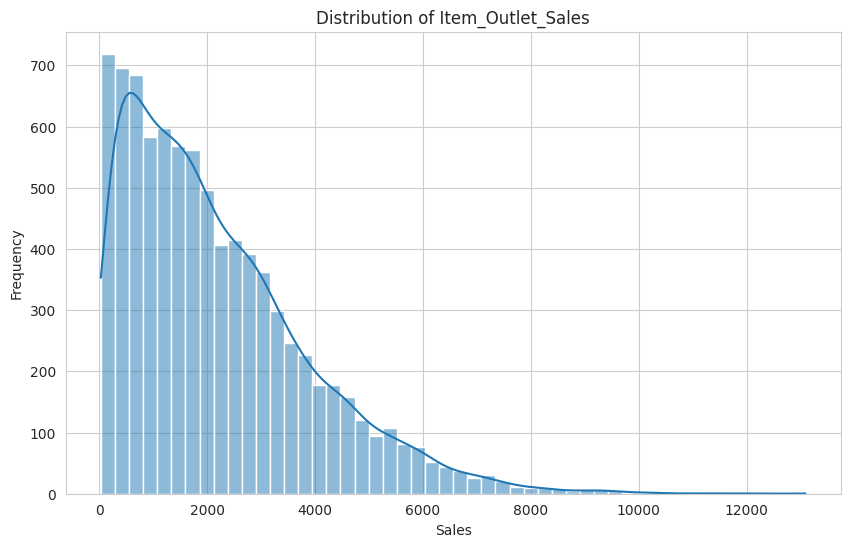

In [30]:
# Visualize the distribution of the target variable (Item_Outlet_Sales)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Item_Outlet_Sales'], bins=50, kde=True)
plt.title('Distribution of Item_Outlet_Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


we can see that the plot is right skewed. it means that a large number of products have low sales, while a few products have very high sales.

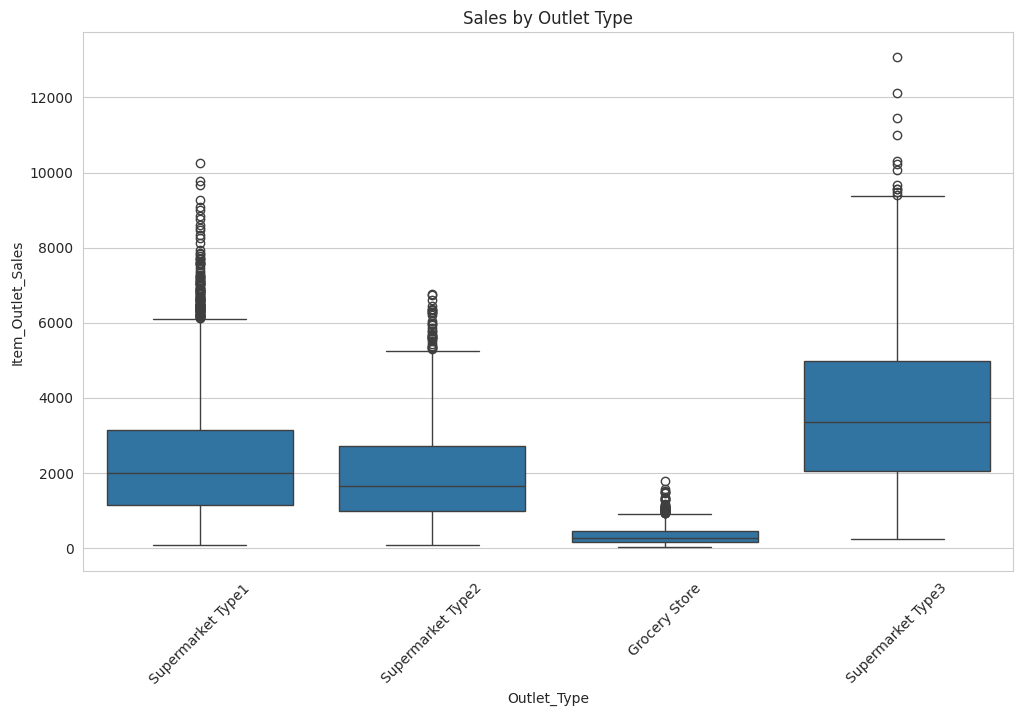

In [31]:
# Visualize sales across different Outlet_Type
plt.figure(figsize=(12, 7))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_df)
plt.title('Sales by Outlet Type')
plt.xticks(rotation=45)
plt.show()

It is clear that 'Supermarket Type3' outlets have the highest median sales and a very wide range, indicating high sales variability.
- 'Grocery Store' outlets have the lowest sales, with most sales figures being very low.
- 'Supermarket Type1' outlets show a consistent sales performance, and
- 'Supermarket Type2' is in between.

This tells us that Outlet_Type is a very important feature for predicting sales.

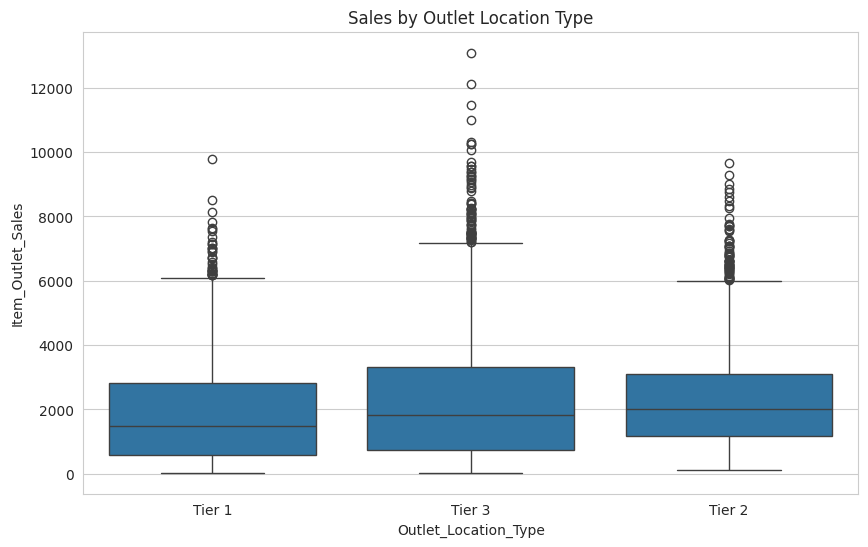

In [32]:
# Visualize sales across different Outlet_Location_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train_df)
plt.title('Sales by Outlet Location Type')
plt.show()

The box plot of sales by Outlet_Location_Type reveals a clear trend.
- 'Tier 1' outlets have the lowest median sales, while 'Tier 3' and 'Tier 2' outlets are closer.

This suggests that the geographical location of the store, possibly indicating the population density or economic status of the area, has a significant impact on sales.

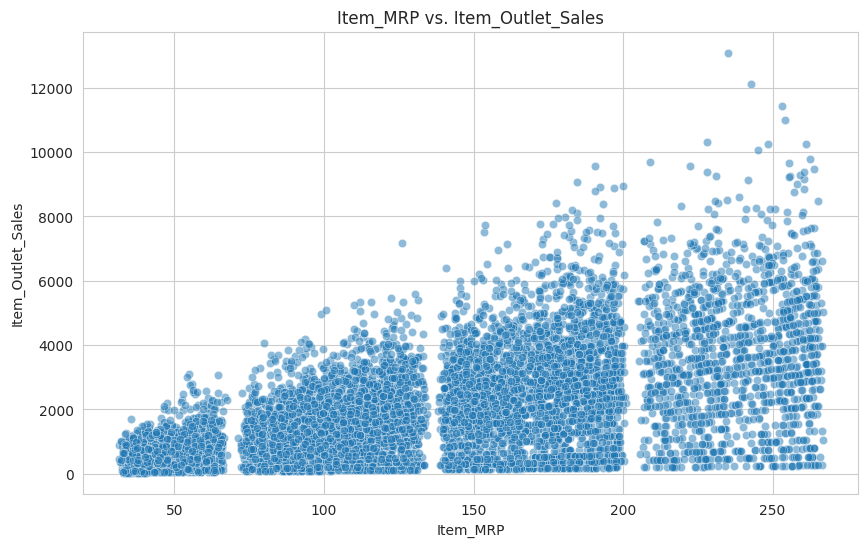

In [33]:
# Visualize the relationship between Item_MRP and Item_Outlet_Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train_df, alpha=0.5)
plt.title('Item_MRP vs. Item_Outlet_Sales')
plt.show()

The scatter plot between Item_MRP (Maximum Retail Price) and Item_Outlet_Sales shows some pattern. The data points seem to form four distinct clusters or price segments, indicating that items are priced in specific ranges. Within each price range, there's a general trend: as Item_MRP increases, Item_Outlet_Sales also tends to increase.

This suggests that expensive products often generate more revenue.

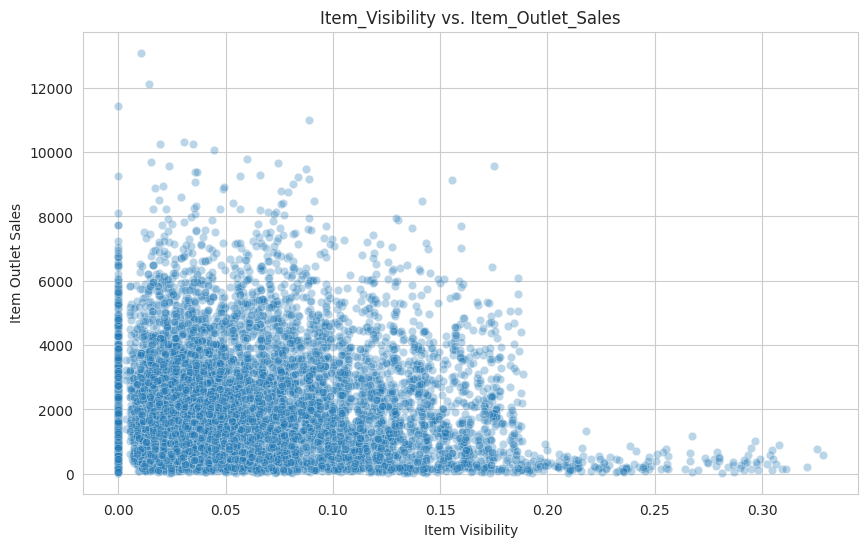

In [34]:
# --- Visualization: Item_Visibility vs. Item_Outlet_Sales ---

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=train_df, alpha=0.3)
plt.title('Item_Visibility vs. Item_Outlet_Sales')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

- Item Visibility increases, item sales decreases

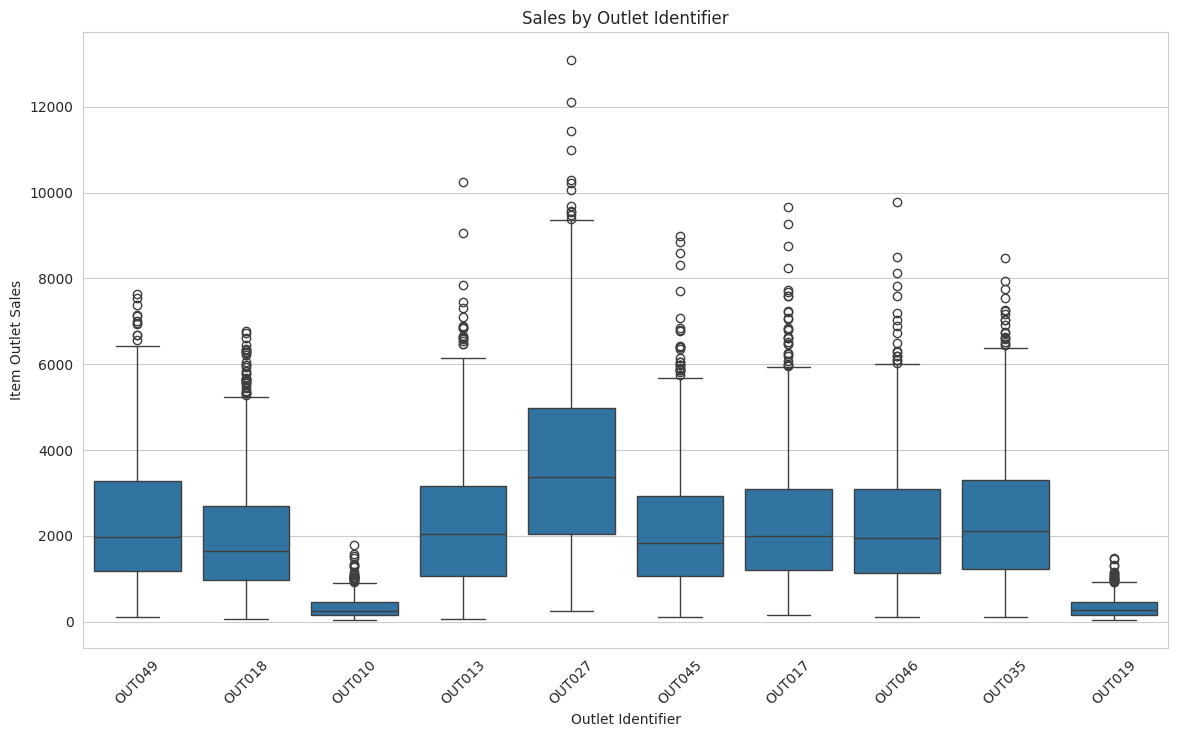

In [35]:
# --- Visualization: Outlet_Identifier vs. Item_Outlet_Sales ---
plt.figure(figsize=(14, 8))
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train_df)
plt.title('Sales by Outlet Identifier')
plt.xlabel('Outlet Identifier')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()

some outlets like OUT027 are high-performing and some of which are low-performing (OUT019, OUT10).
This confirms that store-level factors are crucial for sales prediction

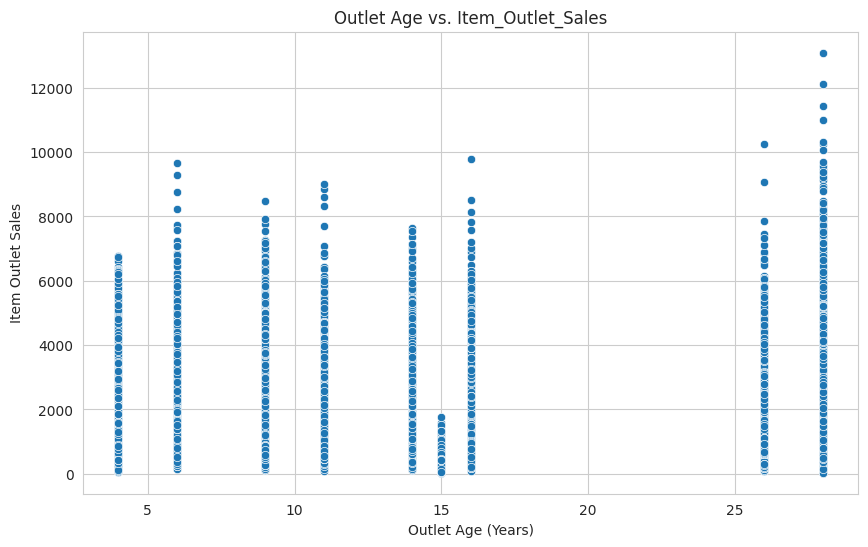

In [36]:
# --- Outlet_Age vs. Item_Outlet_Sales ---

train_df['Outlet_Age'] = 2013 - train_df['Outlet_Establishment_Year']
test_df['Outlet_Age'] = 2013 - test_df['Outlet_Establishment_Year']

# Create a scatter plot to check the relationship between store age and sales.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Outlet_Age', y='Item_Outlet_Sales', data=train_df)
plt.title('Outlet Age vs. Item_Outlet_Sales')
plt.xlabel('Outlet Age (Years)')
plt.ylabel('Item Outlet Sales')
plt.show()

Now Lets start with **Feature Engineering**

Major steps include
 - Categorical variable encoding
 - Scaling
 - Handling the skewed response data

In [37]:
train_df[['Item_Type','Item_Identifier']]

,Item_Type,Item_Identifier
0,Dairy,FDA15
1,Soft Drinks,DRC01
2,Meat,FDN15
3,Fruits and Vegetables,FDX07
4,Household,NCD19
...,...,...
8518,Snack Foods,FDF22
8519,Baking Goods,FDS36
8520,Health and Hygiene,NCJ29
8521,Snack Foods,FDN46


In [38]:
train_df['Item_Identifier_Prefix'] = train_df['Item_Identifier'].str[:2]

In [39]:
test_df['Item_Identifier_Prefix'] = test_df['Item_Identifier'].str[:2]

In [40]:
mapping_table = pd.crosstab(train_df['Item_Identifier_Prefix'], train_df['Item_Type'])
mapping_table

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Identifier_Prefix,,,,,,,,,,,,,,,,
DR,0,0,0,0,140,0,0,214,0,0,0,0,0,0,445,0
FD,648,251,110,649,542,856,1232,0,0,0,425,0,64,1200,0,148
NC,0,0,0,0,0,0,0,0,520,910,0,169,0,0,0,0


- we can see that the first 2 letters of the item identifier commonly represent some idea on products. like DR represent liquids, FD represents food items, NC represents other than food and drink.. lets take this as one of the feature

In [41]:
# Creating Item_MRP_Bins from Item_MRP
train_df['Item_MRP_Bins'] = pd.qcut(train_df['Item_MRP'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
test_df['Item_MRP_Bins'] = pd.qcut(test_df['Item_MRP'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

In [42]:
# Create Outlet_Age feature.
train_df['Outlet_Age'].head()


,Outlet_Age
0,14
1,4
2,14
3,15
4,26


In [43]:
# Drop unnecessary columns before encoding
train_df_preprocessed = train_df.drop(columns=['Item_Identifier', 'Outlet_Establishment_Year'])
test_df_preprocessed = test_df.drop(columns=['Item_Identifier', 'Outlet_Establishment_Year'])

In [44]:
## encoding columns selection

categorical_cols = [
    'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
    'Outlet_Location_Type', 'Outlet_Type', 'Item_MRP_Bins', 'Item_Identifier_Prefix'
]

In [45]:
# `drop_first=True` is used to avoid multicollinearity.
train_encoded = pd.get_dummies(train_df_preprocessed, columns=categorical_cols, drop_first=True, dtype=int)
test_encoded = pd.get_dummies(test_df_preprocessed, columns=categorical_cols, drop_first=True, dtype=int)

In [46]:
# Separate features and target variable for the training set
train_labels = train_encoded['Item_Outlet_Sales']
train_features = train_encoded.drop(columns=['Item_Outlet_Sales'])

In [47]:
train_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_MRP_Bins_Medium,Item_MRP_Bins_High,Item_MRP_Bins_Very High,Item_Identifier_Prefix_FD,Item_Identifier_Prefix_NC
0,9.30,0.016047,249.8092,14,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,5.92,0.019278,48.2692,4,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,14,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,19.20,0.000000,182.0950,15,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,8.93,0.000000,53.8614,26,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [48]:
train_features.corr().style.background_gradient(cmap='coolwarm')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_MRP_Bins_Medium,Item_MRP_Bins_High,Item_MRP_Bins_Very High,Item_Identifier_Prefix_FD,Item_Identifier_Prefix_NC
Item_Weight,1.000000,-0.009215,0.025967,0.013417,0.026315,-0.027852,-0.006854,0.003269,-0.059170,-0.002356,-0.029181,0.032033,-0.006691,0.031975,-0.049035,0.009709,0.048336,-0.005140,0.033807,-0.006619,0.013580,-0.050312,0.027646,0.009862,-0.003664,-0.000156,0.007315,0.004499,-0.003471,-0.016975,-0.000649,0.003167,0.004996,-0.010932,-0.016018,0.010164,-0.007675,-0.000156,0.004499,-0.019951,0.004811,0.023871,-0.014581,0.056260
Item_Visibility,-0.009215,1.000000,-0.001315,0.074834,-0.046386,0.047631,-0.001860,0.000523,0.000416,0.043418,0.011114,0.035984,-0.003153,0.018969,-0.003700,-0.053931,-0.032230,-0.017087,-0.016240,0.014910,0.005635,-0.009825,0.003688,-0.041937,-0.032179,-0.034671,0.210736,-0.051144,-0.033025,-0.038353,-0.038444,-0.036130,-0.081061,0.103092,-0.068787,0.009650,-0.144249,-0.034671,-0.051144,-0.009211,0.006785,0.000598,0.068133,-0.064358
Item_MRP,0.025967,-0.001315,1.000000,-0.005020,-0.000466,0.008299,-0.011904,-0.008865,-0.000112,0.001460,-0.005666,0.035551,-0.013358,0.023688,-0.010089,-0.041646,0.046815,-0.004086,-0.018595,0.001186,0.033817,-0.035808,0.014613,0.002438,-0.008812,0.003850,-0.004976,-0.006714,0.011969,-0.000239,0.005983,-0.003906,-0.004510,0.002734,0.001951,-0.000744,0.004885,0.003850,-0.006714,-0.240760,0.215224,0.758585,0.029315,0.004859
Outlet_Age,0.013417,0.074834,-0.005020,1.000000,-0.002218,0.002051,0.026852,-0.021281,0.003631,0.006768,-0.010998,0.005286,-0.007690,0.005495,-0.006627,0.002961,0.001951,0.013428,0.002874,0.001013,-0.002650,-0.007486,-0.011897,0.453388,-0.382361,-0.466336,0.393918,0.538072,-0.257868,-0.174150,0.034777,-0.048836,0.016346,-0.300724,-0.540820,0.333895,-0.245070,-0.466336,0.538072,-0.016646,0.011423,-0.004897,0.002312,0.004385
Item_Fat_Content_Low Fat,0.026315,-0.046386,-0.000466,-0.002218,1.000000,-0.871729,-0.140476,-0.143620,-0.033774,-0.056544,-0.066300,-0.022231,-0.069325,-0.105859,0.108896,0.170414,0.229783,-0.104144,0.094531,-0.017218,-0.049181,0.078817,-0.029977,-0.000374,-0.002233,-0.005452,-0.001254,-0.004041,0.002843,0.011747,-0.002527,0.003611,-0.003910,0.003936,0.008213,-0.007960,0.008565,-0.005452,-0.004041,0.032372,-0.004311,-0.006850,-0.380995,0.320003
Item_Fat_Content_Regular,-0.027852,0.047631,0.008299,0.002051,-0.871729,1.000000,-0.082632,-0.084482,0.033603,0.065253,0.071969,0.024507,0.079862,0.112353,-0.114921,-0.182533,-0.247576,0.118361,-0.101850,0.015235,0.055759,-0.090075,0.016761,-0.002316,0.002484,-0.002037,-0.002029,0.005605,-0.000984,-0.004692,0.003786,0.000606,0.002783,-0.001177,-0.002123,0.000237,-0.000734,-0.002037,0.005605,-0.026522,0.000575,0.013546,0.409475,-0.344121
Item_Fat_Content_low fat,-0.006854,-0.001860,-0.011904,0.026852,-0.140476,-0.082632,1.000000,-0.013614,0.016464,-0.013195,0.005716,0.011536,-0.024847,-0.015205,0.027578,0.013631,0.013484,-0.021702,-0.001632,0.001897,0.000684,0.005337,-0.007452,0.018992,0.002753,-0.010567,0.025907,0.008945,-0.010644,0.002619,-0.017253,-0.007340,-0.005932,-0.006335,-0.003509,0.006282,-0.007121,-0.010567,0.008945,-0.0166

In [49]:
test_features, train_features = test_encoded.align(train_features, join='left', axis=1)
test_features = test_features.fillna(0) # Fill any missing columns (from non-existent categories in the test set) with 0.

In [50]:
train_features.shape

(8523, 44)

In [51]:
test_features.shape

(5681, 44)

Model implementation

In [52]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

- As per the final submission, we cannot remove the item_identifier or the outler_identifer in our analysis. hence we will re run the linear regression process with the new format where if the field is item_identifer or the outlet_identifer we will not remove it

In [53]:
# Store Item_Identifier and Outlet_Identifier for the final submission file.
test_df_original = test_df[['Item_Identifier', 'Outlet_Identifier']]

In [54]:
train_labels

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [55]:
train_features

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_MRP_Bins_Medium,Item_MRP_Bins_High,Item_MRP_Bins_Very High,Item_Identifier_Prefix_FD,Item_Identifier_Prefix_NC
0,9.300,0.016047,249.8092,14,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,5.920,0.019278,48.2692,4,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,17.500,0.016760,141.6180,14,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,19.200,0.000000,182.0950,15,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,8.930,0.000000,53.8614,26,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,26,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
8519,8.380,0.046982,108.1570,11,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
8520,10.600,0.035186,85.1224,9,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
8521,7.210,0.145221,103.1332,4,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0


In [56]:
# Standardize the features.
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

In [57]:
def backward_elimination_pvalue(X, y, columns, sl=0.05):
    """
    Performs backward elimination based on p-values from an OLS model.
    It protects columns that start with 'Item_Identifier_' or 'Outlet_Identifier_'.
    """
    # Ensure X is a DataFrame to use the .drop() method
    X_copy = pd.DataFrame(X, columns=columns)
    num_features = X_copy.shape[1]

    # Add a constant for the OLS model
    X_copy = sm.add_constant(X_copy)

    for i in range(num_features):
        regressor_OLS = sm.OLS(y, X_copy).fit()
        max_p_value = regressor_OLS.pvalues.iloc[1:].max()

        if max_p_value > sl:
            # Find the feature with the highest p-value
            max_p_value_index = regressor_OLS.pvalues.iloc[1:].idxmax()

            # Check if the column is an identifier column
            if 'Item_Identifier_' in max_p_value_index or 'Outlet_Identifier_' in max_p_value_index:
                print(f"Keeping identifier column '{max_p_value_index}' despite high p-value.")
                continue

            print(f"Removing feature '{max_p_value_index}' with p-value: {max_p_value:.4f}")
            X_copy = X_copy.drop(max_p_value_index, axis=1)
        else:
            break

    # Remove the constant before returning
    X_copy = X_copy.drop('const', axis=1)
    return X_copy


- initially we observed that the sales is skewed. i believe it needs transformation of data. but lets apply the linear regression and understand the scenario with model itself

In [58]:
# Perform feature selection on the scaled features and original labels
train_features_selected_untransformed = backward_elimination_pvalue(train_features_scaled, train_labels, train_features.columns)


Removing feature 'Item_Type_Breakfast' with p-value: 0.9783
Removing feature 'Item_Weight' with p-value: 0.9759
Removing feature 'Item_Type_Meat' with p-value: 0.9622
Removing feature 'Item_Type_Breads' with p-value: 0.9133
Removing feature 'Item_Type_Health and Hygiene' with p-value: 0.8445
Removing feature 'Item_Type_Others' with p-value: 0.9236
Removing feature 'Item_MRP_Bins_Medium' with p-value: 0.8244
Removing feature 'Item_Type_Starchy Foods' with p-value: 0.8012
Removing feature 'Item_Fat_Content_reg' with p-value: 0.8000
Keeping identifier column 'Item_Identifier_Prefix_FD' despite high p-value.
Keeping identifier column 'Item_Identifier_Prefix_FD' despite high p-value.
Keeping identifier column 'Item_Identifier_Prefix_FD' despite high p-value.
Keeping identifier column 'Item_Identifier_Prefix_FD' despite high p-value.
Keeping identifier column 'Item_Identifier_Prefix_FD' despite high p-value.
Keeping identifier column 'Item_Identifier_Prefix_FD' despite high p-value.
Keeping 

In [59]:
# Fit the linear regression model with the original target.
model_untransformed = LinearRegression()
model_untransformed.fit(train_features_selected_untransformed, train_labels)

LinearRegression()

In [60]:

# Get predictions and calculate residuals.
predictions_untransformed = model_untransformed.predict(train_features_selected_untransformed)
residuals_untransformed = train_labels - predictions_untransformed

In [61]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [62]:
# Calculate and print the R-squared score.
r2_untransformed = r2_score(train_labels, predictions_untransformed)
print(f"\nR-squared score for the untransformed model: {r2_untransformed:.4f}")
# Add other metrics for untransformed linear regression
rmse_untransformed = np.sqrt(mean_squared_error(train_labels, predictions_untransformed))
mae_untransformed = mean_absolute_error(train_labels, predictions_untransformed)


R-squared score for the untransformed model: 0.5640


In [65]:
print(f"RMSE value is : {rmse_untransformed}")
print(f"MAE value is : {mae_untransformed}")

RMSE value is : 1126.739297765483
MAE value is : 836.1620227728262


Text(0, 0.5, 'Frequency')

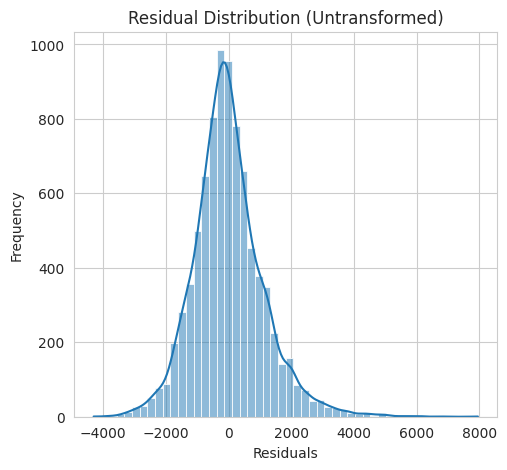

In [66]:
# Plot residual distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals_untransformed, kde=True, bins=50)
plt.title('Residual Distribution (Untransformed)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

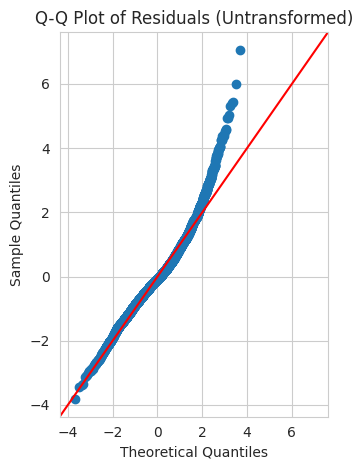

In [67]:
# Plot Q-Q Plot for Normality
plt.subplot(1, 2, 2)
sm.qqplot(residuals_untransformed, line='45', fit=True, ax=plt.gca())
plt.title('Q-Q Plot of Residuals (Untransformed)')
plt.tight_layout()
plt.show()

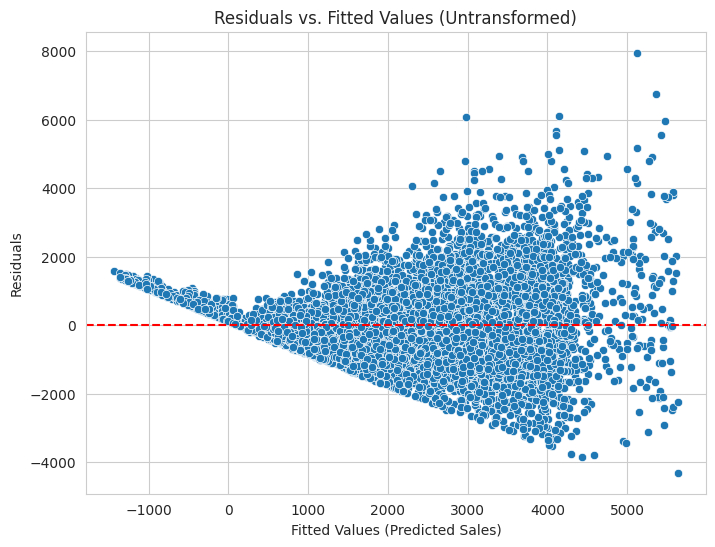

In [68]:
# Plot residuals vs. fitted values for homoscedasticity check
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions_untransformed, y=residuals_untransformed)
plt.title('Residuals vs. Fitted Values (Untransformed)')
plt.xlabel('Fitted Values (Predicted Sales)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

- we can observe the heterodescedic pattern in data. we have either left important variable or the output needs transformation

In [69]:
# Apply the log transformation to the target variable.
train_labels_transformed = np.log(train_labels + 1)

In [70]:
# Perform feature selection on the scaled features and transformed labels
train_features_selected_transformed = backward_elimination_pvalue(train_features_scaled, train_labels_transformed, train_features.columns)

Removing feature 'Item_MRP_Bins_Very High' with p-value: 0.9808
Removing feature 'Item_Weight' with p-value: 0.8815
Removing feature 'Item_Type_Fruits and Vegetables' with p-value: 0.8214
Removing feature 'Item_Type_Seafood' with p-value: 0.8350
Removing feature 'Item_Type_Others' with p-value: 0.7601
Removing feature 'Item_Type_Health and Hygiene' with p-value: 0.9963
Removing feature 'Item_Fat_Content_Low Fat' with p-value: 0.7498
Removing feature 'Item_Fat_Content_reg' with p-value: 0.6586
Removing feature 'Item_Visibility' with p-value: 0.6525
Removing feature 'Item_Type_Starchy Foods' with p-value: 0.5897
Removing feature 'Item_Type_Snack Foods' with p-value: 0.6127
Keeping identifier column 'Item_Identifier_Prefix_NC' despite high p-value.
Keeping identifier column 'Item_Identifier_Prefix_NC' despite high p-value.
Keeping identifier column 'Item_Identifier_Prefix_NC' despite high p-value.
Keeping identifier column 'Item_Identifier_Prefix_NC' despite high p-value.
Keeping identifi

In [71]:
# Fit the linear regression model with the selected features.
model_transformed = LinearRegression()
model_transformed.fit(train_features_selected_transformed, train_labels_transformed)

LinearRegression()

In [72]:
# Get predictions and calculate residuals.
predictions_transformed = model_transformed.predict(train_features_selected_transformed)
residuals_transformed = train_labels_transformed - predictions_transformed

In [73]:
# Calculate and print the R-squared score.
r2_transformed = r2_score(train_labels_transformed, predictions_transformed)
print(f"R-squared score for the log-transformed model: {r2_transformed:.4f}")

R-squared score for the log-transformed model: 0.7319


In [75]:
rmse_transformed = np.sqrt(mean_squared_error(train_labels_transformed, predictions_transformed))
mae_transformed = mean_absolute_error(train_labels_transformed, predictions_transformed)
print(f"MAE (Log Scale): {mae_transformed:.4f}")
print(f"RMSE (log Scale): {rmse_transformed:.4f}")

MAE (Log Scale): 0.4063
RMSE (log Scale): 0.5257


In [77]:
# Inverse transform for original scale metrics
original_labels = np.exp(train_labels_transformed) - 1
original_predictions = np.exp(predictions_transformed) - 1
rmse_orig_transformed = np.sqrt(mean_squared_error(original_labels, original_predictions))
mae_orig_transformed = mean_absolute_error(original_labels, original_predictions)

print(f"RMSE (Original Scale): {rmse_orig_transformed:.4f}")
print(f"MAE (Original Scale): {mae_orig_transformed:.4f}")

RMSE (Original Scale): 1114.8759
MAE (Original Scale): 767.4685


Text(0, 0.5, 'Frequency')

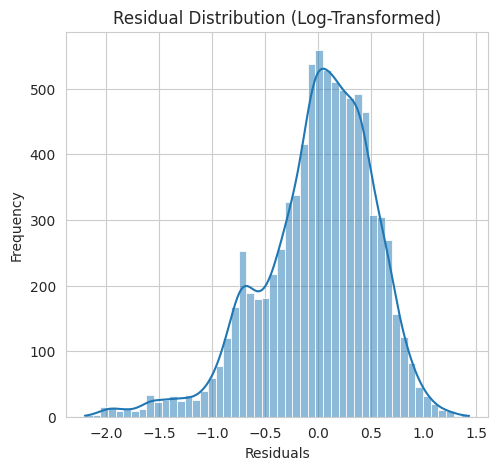

In [78]:
# Plot residual distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals_transformed, kde=True, bins=50)
plt.title('Residual Distribution (Log-Transformed)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

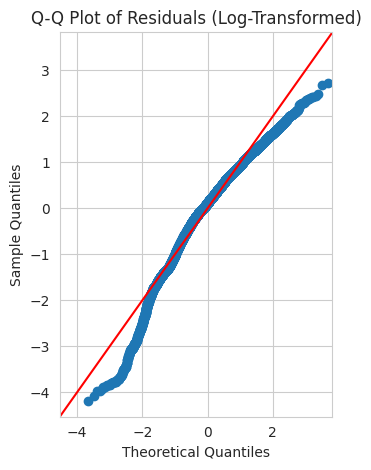

In [79]:
# Plot Q-Q Plot for Normality
plt.subplot(1, 2, 2)
sm.qqplot(residuals_transformed, line='45', fit=True, ax=plt.gca())
plt.title('Q-Q Plot of Residuals (Log-Transformed)')
plt.tight_layout()
plt.show()

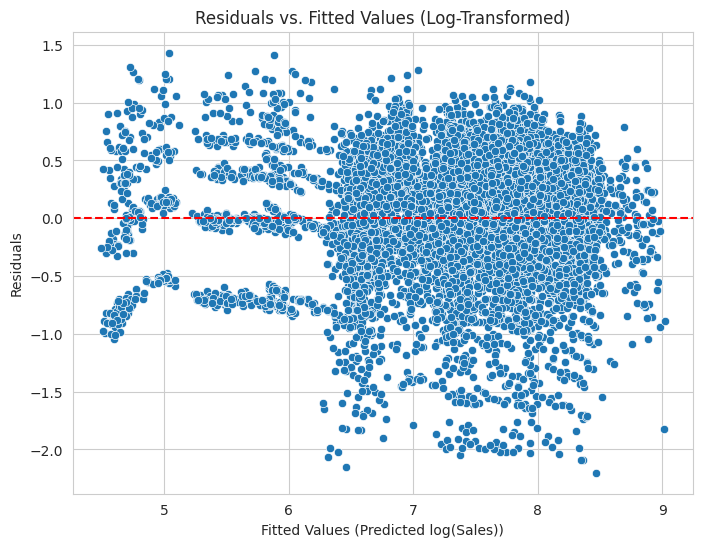

In [80]:
# Plot residuals vs. fitted values for homoscedasticity check
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions_transformed, y=residuals_transformed)
plt.title('Residuals vs. Fitted Values (Log-Transformed)')
plt.xlabel('Fitted Values (Predicted log(Sales))')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

- Now the residual distribution is constant

In [81]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [82]:
# Log transform the target variable. Add 1 to avoid issues with log(0) if present.
train_labels_transformed = np.log(train_labels + 1)

In [83]:
# Standardize the features.
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

In [84]:
# Initialize the Ridge model with GridSearchCV to find the optimal alpha.
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_model = GridSearchCV(Ridge(random_state=42), param_grid, cv=5)

In [85]:
train_features_scaled

array([[-0.7697772 , -0.97073217,  1.74745381, ...,  1.73191534,
         0.62570776, -0.48055788],
       [-1.49748155, -0.90811123, -1.48902325, ..., -0.57739543,
        -1.59819018, -0.48055788],
       [ 0.9956594 , -0.95691733,  0.01004021, ..., -0.57739543,
         0.62570776, -0.48055788],
       ...,
       [-0.48989091, -0.59978449, -0.89720755, ..., -0.57739543,
        -1.59819018,  2.08091479],
       [-1.21974823,  1.53287976, -0.60797692, ..., -0.57739543,
         0.62570776, -0.48055788],
       [ 0.41435711, -0.41193591, -1.05226104, ..., -0.57739543,
        -1.59819018, -0.48055788]])

In [86]:
# Train the model on the transformed data.
print("Training the Ridge model on transformed data...")
ridge_model.fit(train_features_scaled, train_labels_transformed)

Training the Ridge model on transformed data...


GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]})

In [87]:
print(f"Best alpha for Ridge model: {ridge_model.best_params_['alpha']}")
print(f"Best cross-validation R^2 score: {ridge_model.best_score_:.4f}")


Best alpha for Ridge model: 10
Best cross-validation R^2 score: 0.7290


In [88]:
# Get training predictions and metrics for Ridge
ridge_train_preds = ridge_model.predict(train_features_scaled)
r2_ridge = r2_score(train_labels_transformed, ridge_train_preds)
rmse_ridge = np.sqrt(mean_squared_error(train_labels_transformed, ridge_train_preds))
mae_ridge = mean_absolute_error(train_labels_transformed, ridge_train_preds)
# Inverse transform for original scale
original_labels = np.exp(train_labels_transformed) - 1
original_preds_ridge = np.exp(ridge_train_preds) - 1
rmse_orig_ridge = np.sqrt(mean_squared_error(original_labels, original_preds_ridge))
mae_orig_ridge = mean_absolute_error(original_labels, original_preds_ridge)

print(f"\n--- Ridge Regression Metrics ---")
print(f"R-squared Score (Log Scale): {r2_ridge:.4f}")
print(f"RMSE (Log Scale): {rmse_ridge:.4f}")
print(f"MAE (Log Scale): {mae_ridge:.4f}")
print(f"RMSE (Original Scale): {rmse_orig_ridge:.4f}")
print(f"MAE (Original Scale): {mae_orig_ridge:.4f}")


--- Ridge Regression Metrics ---
R-squared Score (Log Scale): 0.7319
RMSE (Log Scale): 0.5256
MAE (Log Scale): 0.4063
RMSE (Original Scale): 1114.4290
MAE (Original Scale): 767.2870


In [89]:
# Make predictions on the preprocessed test data.
ridge_predictions_log = ridge_model.predict(test_features_scaled)

In [90]:
# Inverse transform the predictions to get the original sales values.
ridge_predictions = np.exp(ridge_predictions_log) - 1
ridge_predictions

array([1580.29584432,  996.03969548,  535.95445303, ..., 1608.25763853,
       3316.16428404,  986.67005656])

In [91]:
# Initialize the Lasso model with GridSearchCV to find the optimal alpha.
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_model = GridSearchCV(Lasso(random_state=42, max_iter=2000), param_grid, cv=5)

In [92]:
# Train the model on the transformed data.
print("Training the Lasso model on transformed data...")
lasso_model.fit(train_features_scaled, train_labels_transformed)

Training the Lasso model on transformed data...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.751e+00, tolerance: 6.987e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.954e+00, tolerance: 7.023e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.746e+00, tolerance: 7.121e

GridSearchCV(cv=5, estimator=Lasso(max_iter=2000, random_state=42),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]})

In [93]:
print(f"Best alpha for Lasso model: {lasso_model.best_params_['alpha']}")
print(f"Best cross-validation R^2 score: {lasso_model.best_score_:.4f}")

Best alpha for Lasso model: 0.001
Best cross-validation R^2 score: 0.7293


In [94]:
# Get training predictions and metrics for Lasso
lasso_train_preds = lasso_model.predict(train_features_scaled)
r2_lasso = r2_score(train_labels_transformed, lasso_train_preds)
rmse_lasso = np.sqrt(mean_squared_error(train_labels_transformed, lasso_train_preds))
mae_lasso = mean_absolute_error(train_labels_transformed, lasso_train_preds)
# Inverse transform for original scale
original_preds_lasso = np.exp(lasso_train_preds) - 1
rmse_orig_lasso = np.sqrt(mean_squared_error(original_labels, original_preds_lasso))
mae_orig_lasso = mean_absolute_error(original_labels, original_preds_lasso)

print(f"\n--- Lasso Regression Metrics ---")
print(f"R-squared Score (Log Scale): {r2_lasso:.4f}")
print(f"RMSE (Log Scale): {rmse_lasso:.4f}")
print(f"MAE (Log Scale): {mae_lasso:.4f}")
print(f"RMSE (Original Scale): {rmse_orig_lasso:.4f}")
print(f"MAE (Original Scale): {mae_orig_lasso:.4f}")



--- Lasso Regression Metrics ---
R-squared Score (Log Scale): 0.7318
RMSE (Log Scale): 0.5257
MAE (Log Scale): 0.4065
RMSE (Original Scale): 1114.9645
MAE (Original Scale): 767.6167


In [95]:
# Make predictions on the preprocessed test data.
lasso_predictions_log = lasso_model.predict(test_features_scaled)

In [96]:
lasso_predictions = np.exp(lasso_predictions_log) - 1
lasso_predictions

array([1582.43300478, 1019.24016786,  540.95983079, ..., 1606.43031737,
       3285.38782583,  988.57258582])

In [97]:
print(f"Linear Base model R^2 score: {r2_transformed:.4f}")
print(f"Ridge R^2 score: {ridge_model.best_score_:.4f}")
print(f"Lasso R^2 score: {lasso_model.best_score_:.4f}")

Linear Base model R^2 score: 0.7319
Ridge R^2 score: 0.7290
Lasso R^2 score: 0.7293


Base model is performing good. we can see the log transformed linear model is doing good on train dataset.
Lets go to random forest and see if performance is improving

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


In [99]:
param_grid = {
    'n_estimators': [100, 200],
    'max_features': [0.8, 1.0],
    'min_samples_split': [2, 5]
}

In [100]:
# Initialize GridSearchCV. `oob_score=True` is crucial for getting the OOB score later.
rf_model = RandomForestRegressor(random_state=42, oob_score=True, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

In [101]:
# Train the model with grid search.
print("Training the Random Forest model with Grid Search...")
grid_search.fit(train_features, train_labels)

Training the Random Forest model with Grid Search...


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_jobs=-1, oob_score=True,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [0.8, 1.0],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [102]:
# Get the best model from the grid search.
best_rf_model = grid_search.best_estimator_
best_rf_model

RandomForestRegressor(max_features=0.8, min_samples_split=5, n_estimators=200,
                      n_jobs=-1, oob_score=True, random_state=42)

In [103]:
# Best parameters found by Grid Search.
print(f"Best parameters found by Grid Search: {grid_search.best_params_}")
# Best cross-validation score (R^2).
print(f"Best R-squared score from cross-validation: {grid_search.best_score_:.4f}")
# Out-of-Bag (OOB) score.
print(f"Out-of-Bag R-squared score: {best_rf_model.oob_score_:.4f}")

Best parameters found by Grid Search: {'max_features': 0.8, 'min_samples_split': 5, 'n_estimators': 200}
Best R-squared score from cross-validation: 0.5644
Out-of-Bag R-squared score: 0.5648


In [104]:
# Get training predictions and metrics for Random Forest
rf_train_preds = best_rf_model.predict(train_features)
r2_rf = r2_score(train_labels, rf_train_preds)
rmse_rf = np.sqrt(mean_squared_error(train_labels, rf_train_preds))
mae_rf = mean_absolute_error(train_labels, rf_train_preds)

print(f"\n--- Random Forest Metrics ---")
print(f"R-squared Score: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")


--- Random Forest Metrics ---
R-squared Score: 0.9053
RMSE: 525.1415
MAE: 360.2763


- More hyper parameter tuning can be done, based on the time constraint not proceeding further on hyperparameter tuning

In [105]:
##-----XGBoost Model Building and Prediction ---
from xgboost import XGBRegressor


In [106]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

In [107]:
# Initialize GridSearchCV.
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

In [108]:
# Train the model with grid search.
print("Training the XGBoost model with Grid Search...")
grid_search.fit(train_features, train_labels)

Training the XGBoost model with Grid Search...


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [109]:
# Get the best model from the grid search.
best_xgb_model = grid_search.best_estimator_
best_xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

In [110]:
# --- Step 6: Evaluation and Prediction ---
print("\n--- Model Performance ---")
# Best parameters found by Grid Search.
print(f"Best parameters found by Grid Search: {grid_search.best_params_}")
# Best cross-validation score (R^2).
print(f"Best R-squared score from cross-validation: {grid_search.best_score_:.4f}")


--- Model Performance ---
Best parameters found by Grid Search: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best R-squared score from cross-validation: 0.5942


In [111]:
# Get training predictions and metrics for XGBoost
xgb_train_preds = best_xgb_model.predict(train_features)
r2_xgb = r2_score(train_labels, xgb_train_preds)
rmse_xgb = np.sqrt(mean_squared_error(train_labels, xgb_train_preds))
mae_xgb = mean_absolute_error(train_labels, xgb_train_preds)

In [112]:
print(f"\n--- XGBoost Metrics ---")
print(f"R-squared Score: {r2_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")


--- XGBoost Metrics ---
R-squared Score: 0.6136
RMSE: 1060.6544
MAE: 754.1855


In [113]:
# Make predictions on the preprocessed test data.
xgb_predictions = best_xgb_model.predict(test_features)

In [114]:
xgb_predictions

array([1630.5297, 1430.6945, 1066.7349, ..., 1807.4934, 3663.8262,
       1309.1074], dtype=float32)

- similar to random forest, we need more hyperparameter tuning but because of time constraint stopping here

-- Light GBM implementation

In [115]:
import lightgbm as lgb

In [116]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50],
    'objective': ['regression']
}

In [117]:
# Initialize GridSearchCV.
lgbm_model = lgb.LGBMRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

In [118]:
# Train the model with grid search.
print("Training the LightGBM model with Grid Search...")
grid_search.fit(train_features, train_labels)

Training the LightGBM model with Grid Search...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 8523, number of used features: 44
[LightGBM] [Info] Start training from score 2181.288915


GridSearchCV(cv=5, estimator=LGBMRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1],
                         'n_estimators': [100, 200], 'num_leaves': [31, 50],
                         'objective': ['regression']},
             scoring='r2')

In [119]:
# Get the best model from the grid search.
best_lgbm_model = grid_search.best_estimator_
best_lgbm_model

LGBMRegressor(learning_rate=0.05, n_jobs=-1, objective='regression',
              random_state=42)

In [120]:
# --- Step 6: Evaluation and Prediction ---
print("\n--- Model Performance ---")
# Best parameters found by Grid Search.
print(f"Best parameters found by Grid Search: {grid_search.best_params_}")
# Best cross-validation score (R^2).
print(f"Best R-squared score from cross-validation: {grid_search.best_score_:.4f}")


--- Model Performance ---
Best parameters found by Grid Search: {'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 31, 'objective': 'regression'}
Best R-squared score from cross-validation: 0.5870


In [121]:
# Get training predictions and metrics for LightGBM
lgbm_train_preds = best_lgbm_model.predict(train_features)
r2_lgbm = r2_score(train_labels, lgbm_train_preds)
rmse_lgbm = np.sqrt(mean_squared_error(train_labels, lgbm_train_preds))
mae_lgbm = mean_absolute_error(train_labels, lgbm_train_preds)

print(f"\n--- LightGBM Metrics ---")
print(f"R-squared Score: {r2_lgbm:.4f}")
print(f"RMSE: {rmse_lgbm:.4f}")
print(f"MAE: {mae_lgbm:.4f}")


--- LightGBM Metrics ---
R-squared Score: 0.6729
RMSE: 975.8622
MAE: 695.2960


In [122]:
# Make predictions on the preprocessed test data.
lgbm_predictions = best_lgbm_model.predict(test_features)
lgbm_predictions

array([1734.27535797, 1342.74986215,  620.46121239, ..., 1840.93401616,
       4280.30574778, 1290.29857602])

In [126]:
print("\n\n--- Final Model Performance Summary ---")

# Data for the DataFrame
results = {
    'Model': [
        'Linear Regression (Base)',
        'Linear Regression (Log-Transformed)',
        'Ridge Regression',
        'Lasso Regression',
        'Random Forest',
        'XGBoost',
        'LightGBM'
    ],
    'R2 Score': [
        r2_untransformed,
        r2_transformed,
        r2_ridge,
        r2_lasso,
        grid_search.best_score_,
        r2_xgb,
        r2_lgbm
    ],
    'RMSE': [
        rmse_untransformed,
        rmse_orig_transformed, # Use original scale for comparison
        rmse_orig_ridge,
        rmse_orig_lasso,
        rmse_rf,
        rmse_xgb,
        rmse_lgbm
    ],
    'MAE': [
        mae_untransformed,
        mae_orig_transformed, # Use original scale for comparison
        mae_orig_ridge,
        mae_orig_lasso,
        mae_rf,
        mae_xgb,
        mae_lgbm
    ]
}



--- Final Model Performance Summary ---


In [127]:
# Create the DataFrame
metrics_df = pd.DataFrame(results)

In [128]:
# Set the display format for floats to be more readable
pd.set_option('display.float_format', '{:.4f}'.format)

# Display the DataFrame
print(metrics_df)

                                 Model  R2 Score      RMSE      MAE
0             Linear Regression (Base)    0.5640 1126.7393 836.1620
1  Linear Regression (Log-Transformed)    0.7319 1114.8759 767.4685
2                     Ridge Regression    0.7319 1114.4290 767.2870
3                     Lasso Regression    0.7318 1114.9645 767.6167
4                        Random Forest    0.5870  525.1415 360.2763
5                              XGBoost    0.6136 1060.6544 754.1855
6                             LightGBM    0.6729  975.8622 695.2960


- Few observations:
  - Linear Regression with the Log transformed is performing good
  - RMSE for RandomForest are low, its a good parameter to notice. We can do more hyperparameter tuning to understand if it works better
  - Note these are all train r2 values. we dont have test data y variable. Probably they need real time scenario data how its behaving.

Things proposed:
- In train data itself we will split as train and test to understand the r2 value. so we are sure of r2 value for test data set
<<Same steps to be performed again with the train_df itself split for train and test split>>

In [138]:
# Separate the features (X) and the target variable (y)
# The features are all columns except 'Item_Outlet_Sales'.
X = train_df.drop('Item_Outlet_Sales', axis=1)

# The target variable is 'Item_Outlet_Sales'.
y = train_df['Item_Outlet_Sales']

In [139]:
X = X.drop(columns=['Item_Identifier', 'Outlet_Establishment_Year'])

In [140]:
categorical_cols = [
    'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
    'Outlet_Location_Type', 'Outlet_Type', 'Item_MRP_Bins', 'Item_Identifier_Prefix'
]


In [141]:
x_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=int)


In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

# Print the shapes of the new datasets to verify the split.
print(f"Shape of the original DataFrame: {train_df.shape}")
print(f"Shape of the new training features (X_train): {X_train.shape}")
print(f"Shape of the new testing features (X_test): {X_test.shape}")
print(f"Shape of the new training target (y_train): {y_train.shape}")
print(f"Shape of the new testing target (y_test): {y_test.shape}")

Shape of the original DataFrame: (8523, 15)
Shape of the new training features (X_train): (6818, 44)
Shape of the new testing features (X_test): (1705, 44)
Shape of the new training target (y_train): (6818,)
Shape of the new testing target (y_test): (1705,)


In [144]:
# Standardize the features. This will now work as all remaining columns are numeric.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [145]:
# --------------------------------------------------------------------------------------------------
# Base Linear Regression Model
# --------------------------------------------------------------------------------------------------
model_base = LinearRegression()
model_base.fit(X_train_scaled, y_train)

# Get predictions on both train and test sets
y_train_pred_base = model_base.predict(X_train_scaled)
y_test_pred_base = model_base.predict(X_test_scaled)

# Calculate metrics for the base model
r2_base_train = r2_score(y_train, y_train_pred_base)
r2_base_test = r2_score(y_test, y_test_pred_base)
rmse_base_test = np.sqrt(mean_squared_error(y_test, y_test_pred_base))
mae_base_test = mean_absolute_error(y_test, y_test_pred_base)

print(f"--- Base Linear Regression Metrics ---")
print(f"R-squared Score (Train): {r2_base_train:.4f}")
print(f"R-squared Score (Test): {r2_base_test:.4f}")
print(f"RMSE (Test): {rmse_base_test:.4f}")
print(f"MAE (Test): {mae_base_test:.4f}")

--- Base Linear Regression Metrics ---
R-squared Score (Train): 0.5598
R-squared Score (Test): 0.5787
RMSE (Test): 1070.0990
MAE (Test): 793.3079


In [146]:
# --------------------------------------------------------------------------------------------------
# Log-Transformed Linear Regression Model
# --------------------------------------------------------------------------------------------------
# Apply log transformation to the target variable
y_train_log = np.log(y_train + 1)
y_test_log = np.log(y_test + 1)

model_log = LinearRegression()
model_log.fit(X_train_scaled, y_train_log)

# Get predictions on both train and test sets (on log scale)
y_train_pred_log = model_log.predict(X_train_scaled)
y_test_pred_log = model_log.predict(X_test_scaled)

# Calculate R2 on the log scale
r2_log_train = r2_score(y_train_log, y_train_pred_log)
r2_log_test = r2_score(y_test_log, y_test_pred_log)

# Inverse transform predictions to get metrics on the original scale
y_train_pred_orig = np.exp(y_train_pred_log) - 1
y_test_pred_orig = np.exp(y_test_pred_log) - 1
rmse_log_test = np.sqrt(mean_squared_error(y_test, y_test_pred_orig))
mae_log_test = mean_absolute_error(y_test, y_test_pred_orig)

print(f"\n--- Log-Transformed Linear Regression Metrics ---")
print(f"R-squared Score (Train): {r2_log_train:.4f}")
print(f"R-squared Score (Test): {r2_log_test:.4f}")
print(f"RMSE (Test): {rmse_log_test:.4f}")
print(f"MAE (Test): {mae_log_test:.4f}")


--- Log-Transformed Linear Regression Metrics ---
R-squared Score (Train): 0.7295
R-squared Score (Test): 0.7389
RMSE (Test): 1059.7332
MAE (Test): 725.7948


In [147]:
# --------------------------------------------------------------------------------------------------
# Create a DataFrame to summarize all model metrics
# --------------------------------------------------------------------------------------------------
print("\n--- Final Model Performance Summary ---")

results = {
    'Model': [
        'Linear Regression (Base)',
        'Linear Regression (Log-Transformed)'
    ],
    'R2 Score (Train)': [
        r2_base_train,
        r2_log_train
    ],
    'R2 Score (Test)': [
        r2_base_test,
        r2_log_test
    ],
    'RMSE (Test)': [
        rmse_base_test,
        rmse_log_test
    ],
    'MAE (Test)': [
        mae_base_test,
        mae_log_test
    ]
}

metrics_df = pd.DataFrame(results)
pd.set_option('display.float_format', '{:.4f}'.format)
print(metrics_df)


--- Final Model Performance Summary ---
                                 Model  R2 Score (Train)  R2 Score (Test)  \
0             Linear Regression (Base)            0.5598           0.5787   
1  Linear Regression (Log-Transformed)            0.7295           0.7389   

   RMSE (Test)  MAE (Test)  
0    1070.0990    793.3079  
1    1059.7332    725.7948  


In [148]:
metrics_df

,Model,R2 Score (Train),R2 Score (Test),RMSE (Test),MAE (Test)
0,Linear Regression (Base),0.5598,0.5787,1070.0990,793.3079
1,Linear Regression (Log-Transformed),0.7295,0.7389,1059.7332,725.7948


In [149]:
# --------------------------------------------------------------------------------------------------
# Random Forest Model
# --------------------------------------------------------------------------------------------------
param_grid_rf = {'n_estimators': [100, 200], 'max_features': [0.8, 1.0]}
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='r2')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Get predictions and calculate metrics
y_train_pred_rf = best_rf_model.predict(X_train)
y_test_pred_rf = best_rf_model.predict(X_test)
y_test_pred_rf[y_test_pred_rf < 0] = 0
r2_rf_train = r2_score(y_train, y_train_pred_rf)
r2_rf_test = r2_score(y_test, y_test_pred_rf)
rmse_rf_test = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
mae_rf_test = mean_absolute_error(y_test, y_test_pred_rf)


In [150]:
# --------------------------------------------------------------------------------------------------
# 4. XGBoost Model
# --------------------------------------------------------------------------------------------------
param_grid_xgb = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, scoring='r2')
grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_

# Get predictions and calculate metrics
y_train_pred_xgb = best_xgb_model.predict(X_train)
y_test_pred_xgb = best_xgb_model.predict(X_test)
r2_xgb_train = r2_score(y_train, y_train_pred_xgb)
r2_xgb_test = r2_score(y_test, y_test_pred_xgb)
rmse_xgb_test = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
mae_xgb_test = mean_absolute_error(y_test, y_test_pred_xgb)

In [151]:
# --------------------------------------------------------------------------------------------------
# 5. Final Model Performance Summary
# --------------------------------------------------------------------------------------------------
print("\n--- Final Model Performance Summary ---")

results = {
    'Model': ['Linear Regression (Base)', 'Linear Regression (Log-Transformed)', 'Random Forest', 'XGBoost'],
    'R2 Score (Train)': [r2_base_train, r2_log_train, r2_rf_train, r2_xgb_train],
    'R2 Score (Test)': [r2_base_test, r2_log_test, r2_rf_test, r2_xgb_test],
    'RMSE (Test)': [rmse_base_test, rmse_log_test, rmse_rf_test, rmse_xgb_test],
    'MAE (Test)': [mae_base_test, mae_log_test, mae_rf_test, mae_xgb_test]
}

metrics_df = pd.DataFrame(results)
pd.set_option('display.float_format', '{:.4f}'.format)
print(metrics_df)


--- Final Model Performance Summary ---
                                 Model  R2 Score (Train)  R2 Score (Test)  \
0             Linear Regression (Base)            0.5598           0.5787   
1  Linear Regression (Log-Transformed)            0.7295           0.7389   
2                        Random Forest            0.9387           0.5697   
3                              XGBoost            0.6115           0.6100   

   RMSE (Test)  MAE (Test)  
0    1070.0990    793.3079  
1    1059.7332    725.7948  
2    1081.4189    755.9581  
3    1029.5234    729.5537  


In [152]:
metrics_df

,Model,R2 Score (Train),R2 Score (Test),RMSE (Test),MAE (Test)
0,Linear Regression (Base),0.5598,0.5787,1070.0990,793.3079
1,Linear Regression (Log-Transformed),0.7295,0.7389,1059.7332,725.7948
2,Random Forest,0.9387,0.5697,1081.4189,755.9581
3,XGBoost,0.6115,0.6100,1029.5234,729.5537


- we will proceed to follow the Linear Regression Log transformed model based on this output

In [159]:
test_df.shape

(5681, 14)

In [160]:
# Separate features and target variable from the full training set
X_train = train_df.drop('Item_Outlet_Sales', axis=1)
y_train = train_df['Item_Outlet_Sales']
X_test = test_df.copy()

In [161]:
# Drop columns that are not useful for modeling
X_train = X_train.drop(columns=['Item_Identifier', 'Outlet_Establishment_Year'])
X_test = X_test.drop(columns=['Item_Identifier', 'Outlet_Establishment_Year'])

In [162]:
# List all categorical columns to be encoded
categorical_cols = [
    'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
    'Outlet_Location_Type', 'Outlet_Type', 'Item_MRP_Bins', 'Item_Identifier_Prefix'
]

# Perform one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True, dtype=int)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True, dtype=int)

# Align columns to ensure both encoded sets have the same features.
# This is crucial for consistency between training and test data.
X_test_encoded, X_train_encoded = X_test_encoded.align(X_train_encoded, join='left', axis=1)
X_test_encoded = X_test_encoded.fillna(0)

# Standardize the features for both training and test sets.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [163]:
# --------------------------------------------------------------------------------------------------
# Final Model Training and Prediction
# --------------------------------------------------------------------------------------------------
print("Training the final model on the entire training dataset...")
# Train the chosen model (Log-Transformed Linear Regression) on the entire training set.
y_train_log = np.log(y_train + 1)
model_log = LinearRegression()
model_log.fit(X_train_scaled, y_train_log)

# Make predictions on the preprocessed Kaggle test data.
predictions_log = model_log.predict(X_test_scaled)

# Inverse transform the predictions back to the original scale.
predictions_final = np.exp(predictions_log) - 1

# Ensure predictions are not negative.
predictions_final[predictions_final < 0] = 0

Training the final model on the entire training dataset...


In [164]:
# --------------------------------------------------------------------------------------------------
# Create and Save the Submission File
# --------------------------------------------------------------------------------------------------
print("\nCreating the final submission file...")

# Create the submission DataFrame with the required columns and the new predictions.
submission_df = test_df[['Item_Identifier', 'Outlet_Identifier']].copy()
submission_df['Item_Outlet_Sales'] = predictions_final

# Save to a CSV file.
submission_df.to_csv('final_submission.csv', index=False)

print("\nFinal submission file 'final_submission.csv' created successfully.")


Creating the final submission file...

Final submission file 'final_submission.csv' created successfully.
